# Sleep Analytics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
# Load dataset
df = pd.read_csv('../data/garmin/sleep.csv', sep=',')

# Drop not needed columns
df = df.drop(columns=['User Id', 'User Last Name', 'User Email', 'Team Names', 'Group Names', 
                      'Calendar Date (UTC)', 'Start Time (UTC)', 'End Time (UTC)',
                     'Validation', 'Time Zone (s)', 'Timezone (Local)', 'Summary Id'])

# Convert data types
df['Calendar Date (Local)'] = pd.to_datetime(df['Calendar Date (Local)'])
df['Start Time (Local)'] = pd.to_datetime(df['Start Time (Local)'])
df['End Time (Local)'] = pd.to_datetime(df['End Time (Local)'])
df['Processing Time'] = pd.to_datetime(df['Processing Time'])
df['SleepPhaseStartTime'] = pd.to_datetime(df['SleepPhaseStartTime'])
#df['SleepPhaseEndTime'] = df['SleepPhaseEndTime'].str.replace('T',' ')
df['SleepPhaseEndTime'] = pd.to_datetime(df['SleepPhaseEndTime'], format='mixed')

# Only use records from device
df = df[df['Source'] == 'device']

# Get overview about data types
print(df.dtypes)

# Get overview about data in the dataset
df

User First Name                     object
Calendar Date (Local)       datetime64[ns]
Start Time (Local)          datetime64[ns]
End Time (Local)            datetime64[ns]
Start Time (s)                       int64
Processing Time             datetime64[ns]
Duration (s)                         int64
Rem Sleep Duration (s)               int64
Deep Sleep Duration (s)              int64
Light Sleep Duration (s)             int64
Awake Duration (s)                   int64
Sleep Efficiency                   float64
Sleep Score Value                  float64
Sleep Score Qualifier               object
Source                              object
SleepPhaseStartTimeSec               int64
SleepPhaseEndTimeSec                 int64
SleepPhaseStartTime         datetime64[ns]
SleepPhaseEndTime           datetime64[ns]
SleepPhaseDuration                   int64
SleepLevel                          object
dtype: object


,User First Name,Calendar Date (Local),Start Time (Local),End Time (Local),Start Time (s),Processing Time,Duration (s),Rem Sleep Duration (s),Deep Sleep Duration (s),Light Sleep Duration (s),...,Sleep Efficiency,Sleep Score Value,Sleep Score Qualifier,Source,SleepPhaseStartTimeSec,SleepPhaseEndTimeSec,SleepPhaseStartTime,SleepPhaseEndTime,SleepPhaseDuration,SleepLevel
0,P10,2023-12-22,2023-12-22 01:17:00,2023-12-22 09:03:00,1703204220,2023-12-23 09:51:08.503,27960,8400,3000,16560,...,1.000000,94.0,Excellent,device,1703204580,1703206800,2023-12-22 01:23:00,2023-12-22 02:00:00,2220,deep
1,P10,2023-12-22,2023-12-22 01:17:00,2023-12-22 09:03:00,1703204220,2023-12-23 09:51:08.503,27960,8400,3000,16560,...,1.000000,94.0,Excellent,device,1703210520,1703211300,2023-12-22 03:02:00,2023-12-22 03:15:00,780,deep
2,P10,2023-12-22,2023-12-22 01:17:00,2023-12-22 09:03:00,1703204220,2023-12-23 09:51:08.503,27960,8400,3000,16560,...,1.000000,94.0,Excellent,device,1703204220,1703204580,2023-12-22 01:17:00,2023-12-22 01:23:00,360,light
3,P10,2023-12-22,2023-12-22 01:17:00,2023-12-22 09:03:00,1703204220,2023-12-23 09:51:08.503,27960,8400,3000,16560,...,1.000000,94.0,Excellent,device,1703206800,1703207700,2023-12-22 02:00:00,2023-12-22 02:15:00,900,light
4,P10,2023-12-22,2023-12-22 01:17:00,2023-12-22 09:03:00,1703204220,2023-12-23 09:51:08.503,27960,8400,3000,16560,...,1.000000,94.0,Excellent,device,1703208240,1703210520,2023-12-22 02:24:00,2023-12-22 03:02:00,2280,light
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3791,P14,2024-01-08,2024-01-08 00:01:00,2024-01-08 07:34:00,1704668460,2024-01-08 10:41:41.126,27180,4140,6600,16380,...,0.997792,92.0,Excellent,device,1704695040,1704695640,2024-01-08 07:24:00,2024-01-08 07:34:00,600,light
3792,P14,2024-01-08,2024-01-08 00:01:00,2024-01-08 07:34:00,1704668460,2024-01-08 10:41:41.126,27180,4140,6600,16380,...,0.997792,92.0,Excellent,device,1704679020,1704679620,2024-01-08 02:57:00,2024-01-08 03:07:00,600,rem
3793,P14,2024-01-08,2024-01-08 00:01:00,2024-01-08 07:34:00,1704668460,2024-01-08 10:41:41.126,27180,4140,6600,16380,...,0.997792,92.0,Excellent,device,1704687960,1704690420,2024-01-08 05:26:00,2024-01-08 06:07:00,2460,rem
3794,P14,2024-01-08,2024-01-08 00:01:00,2024-01-08 07:34:00,1704668460,2024-01-08 10:41:41.126,27180,4140,6600,16380,...,0.997792,92.0,Excellent,device,1704693960,1704695040,2024-01-08 07:06:00,2024-01-08 07:24:00,1080,rem


## View data of a single individual for a given day

In [22]:
# Select user = P12 and day = 2023-12-24
df_p12 = df[df['User First Name'] == 'P12']
df_p12_xmas = df_p12[df_p12['Calendar Date (Local)'] == '2023-12-24']

# Print
df_p12_xmas

,User First Name,Calendar Date (Local),Start Time (Local),End Time (Local),Start Time (s),Processing Time,Duration (s),Rem Sleep Duration (s),Deep Sleep Duration (s),Light Sleep Duration (s),...,Sleep Efficiency,Sleep Score Value,Sleep Score Qualifier,Source,SleepPhaseStartTimeSec,SleepPhaseEndTimeSec,SleepPhaseStartTime,SleepPhaseEndTime,SleepPhaseDuration,SleepLevel
2061,P12,2023-12-24,2023-12-24 00:48:00,2023-12-24 05:14:40,1703375280,2023-12-25 17:28:23.071,16000,2200,5040,7500,...,0.99625,56.0,Poor,device,1703376000,1703378520,2023-12-24 01:00:00,2023-12-24 01:42:00,2520,deep
2062,P12,2023-12-24,2023-12-24 00:48:00,2023-12-24 05:14:40,1703375280,2023-12-25 17:28:23.071,16000,2200,5040,7500,...,0.99625,56.0,Poor,device,1703380920,1703382300,2023-12-24 02:22:00,2023-12-24 02:45:00,1380,deep
2063,P12,2023-12-24,2023-12-24 00:48:00,2023-12-24 05:14:40,1703375280,2023-12-25 17:28:23.071,16000,2200,5040,7500,...,0.99625,56.0,Poor,device,1703387160,1703388300,2023-12-24 04:06:00,2023-12-24 04:25:00,1140,deep
2064,P12,2023-12-24,2023-12-24 00:48:00,2023-12-24 05:14:40,1703375280,2023-12-25 17:28:23.071,16000,2200,5040,7500,...,0.99625,56.0,Poor,device,1703375280,1703376000,2023-12-24 00:48:00,2023-12-24 01:00:00,720,light
2065,P12,2023-12-24,2023-12-24 00:48:00,2023-12-24 05:14:40,1703375280,2023-12-25 17:28:23.071,16000,2200,5040,7500,...,0.99625,56.0,Poor,device,1703378520,1703379720,2023-12-24 01:42:00,2023-12-24 02:02:00,1200,light
2066,P12,2023-12-24,2023-12-24 00:48:00,2023-12-24 05:14:40,1703375280,2023-12-25 17:28:23.071,16000,2200,5040,7500,...,0.99625,56.0,Poor,device,1703379780,1703380920,2023-12-24 02:03:00,2023-12-24 02:22:00,1140,light
2067,P12,2023-12-24,2023-12-24 00:48:00,2023-12-24 05:14:40,1703375280,2023-12-25 17:28:23.071,16000,2200,5040,7500,...,0.99625,56.0,Poor,device,1703382300,1703383440,2023-12-24 02:45:00,2023-12-24 03:04:00,1140,light
2068,P12,2023-12-24,2023-12-24 00:48:00,2023-12-24 05:14:40,1703375280,2023-12-25 17:28:23.071,16000,2200,5040,7500,...,0.99625,56.0,Poor,device,1703385720,1703387160,2023-12-24 03:42:00,2023-12-24 04:06:00,1440,light
2069,P12,2023-12-24,2023-12-24 00:48:00,2023-12-24 05:14:40,1703375280,2023-12-25 17:28:23.071,16000,2200,5040,7500,...,0.99625,56.0,Poor,device,1703388300,1703390160,2023-12-24 04:25:00,2023-12-24 04:56:00,1860,light
2070,P12,2023-12-24,2023-12-24 00:48:00,2023-12-24 05:14:40,1703375280,2023-12-25 17:28:23.071,16000,2200,5040,7500,...,0.99625,56.0,Poor,device,1703383440,1703384520,2023-12-24 03:04:00,2023-12-24 03:22:00,1080,rem


In [23]:
df_p12_xmas = df_p12_xmas[df_p12_xmas['Source'] == 'device']

# Print
df_p12_xmas

,User First Name,Calendar Date (Local),Start Time (Local),End Time (Local),Start Time (s),Processing Time,Duration (s),Rem Sleep Duration (s),Deep Sleep Duration (s),Light Sleep Duration (s),...,Sleep Efficiency,Sleep Score Value,Sleep Score Qualifier,Source,SleepPhaseStartTimeSec,SleepPhaseEndTimeSec,SleepPhaseStartTime,SleepPhaseEndTime,SleepPhaseDuration,SleepLevel
2061,P12,2023-12-24,2023-12-24 00:48:00,2023-12-24 05:14:40,1703375280,2023-12-25 17:28:23.071,16000,2200,5040,7500,...,0.99625,56.0,Poor,device,1703376000,1703378520,2023-12-24 01:00:00,2023-12-24 01:42:00,2520,deep
2062,P12,2023-12-24,2023-12-24 00:48:00,2023-12-24 05:14:40,1703375280,2023-12-25 17:28:23.071,16000,2200,5040,7500,...,0.99625,56.0,Poor,device,1703380920,1703382300,2023-12-24 02:22:00,2023-12-24 02:45:00,1380,deep
2063,P12,2023-12-24,2023-12-24 00:48:00,2023-12-24 05:14:40,1703375280,2023-12-25 17:28:23.071,16000,2200,5040,7500,...,0.99625,56.0,Poor,device,1703387160,1703388300,2023-12-24 04:06:00,2023-12-24 04:25:00,1140,deep
2064,P12,2023-12-24,2023-12-24 00:48:00,2023-12-24 05:14:40,1703375280,2023-12-25 17:28:23.071,16000,2200,5040,7500,...,0.99625,56.0,Poor,device,1703375280,1703376000,2023-12-24 00:48:00,2023-12-24 01:00:00,720,light
2065,P12,2023-12-24,2023-12-24 00:48:00,2023-12-24 05:14:40,1703375280,2023-12-25 17:28:23.071,16000,2200,5040,7500,...,0.99625,56.0,Poor,device,1703378520,1703379720,2023-12-24 01:42:00,2023-12-24 02:02:00,1200,light
2066,P12,2023-12-24,2023-12-24 00:48:00,2023-12-24 05:14:40,1703375280,2023-12-25 17:28:23.071,16000,2200,5040,7500,...,0.99625,56.0,Poor,device,1703379780,1703380920,2023-12-24 02:03:00,2023-12-24 02:22:00,1140,light
2067,P12,2023-12-24,2023-12-24 00:48:00,2023-12-24 05:14:40,1703375280,2023-12-25 17:28:23.071,16000,2200,5040,7500,...,0.99625,56.0,Poor,device,1703382300,1703383440,2023-12-24 02:45:00,2023-12-24 03:04:00,1140,light
2068,P12,2023-12-24,2023-12-24 00:48:00,2023-12-24 05:14:40,1703375280,2023-12-25 17:28:23.071,16000,2200,5040,7500,...,0.99625,56.0,Poor,device,1703385720,1703387160,2023-12-24 03:42:00,2023-12-24 04:06:00,1440,light
2069,P12,2023-12-24,2023-12-24 00:48:00,2023-12-24 05:14:40,1703375280,2023-12-25 17:28:23.071,16000,2200,5040,7500,...,0.99625,56.0,Poor,device,1703388300,1703390160,2023-12-24 04:25:00,2023-12-24 04:56:00,1860,light
2070,P12,2023-12-24,2023-12-24 00:48:00,2023-12-24 05:14:40,1703375280,2023-12-25 17:28:23.071,16000,2200,5040,7500,...,0.99625,56.0,Poor,device,1703383440,1703384520,2023-12-24 03:04:00,2023-12-24 03:22:00,1080,rem


In [24]:
# Get sleep duaration for a given day
df_sleep = df_p12_xmas.iloc[0]
sleep_duration = df_sleep['End Time (Local)'] - df_sleep['Start Time (Local)']
print("Sleep duration: ", sleep_duration)

Sleep duration:  0 days 04:26:40


In [25]:
# Create a table of sleep times of a user for all days
df_sleeptime = df_p12.loc[:, ['Calendar Date (Local)', 'Start Time (Local)', 'End Time (Local)', 'Duration (s)']]

# Remove duplicates
df_sleeptime = df_sleeptime.drop_duplicates()

# Calculate sleep minutes and hours
df_sleeptime['Duration (m)'] = df_sleeptime['Duration (s)'] / 60
df_sleeptime['Duration (h)'] = df_sleeptime['Duration (m)'] / 60

# Print
df_sleeptime

,Calendar Date (Local),Start Time (Local),End Time (Local),Duration (s),Duration (m),Duration (h)
1289,2023-12-23,2023-12-23 00:52:00,2023-12-23 08:45:00,28380,473.000000,7.883333
1613,2023-12-23,2023-12-23 05:21:00,2023-12-23 08:45:00,12240,204.000000,3.400000
1745,2023-12-23,2023-12-23 05:56:00,2023-12-23 08:45:00,10140,169.000000,2.816667
1865,2023-12-23,2023-12-23 06:29:00,2023-12-23 08:45:00,8160,136.000000,2.266667
1961,2023-12-23,2023-12-23 07:04:00,2023-12-23 08:45:00,6060,101.000000,1.683333
2033,2023-12-23,2023-12-23 08:21:00,2023-12-23 08:45:00,1440,24.000000,0.400000
2061,2023-12-24,2023-12-24 00:48:00,2023-12-24 05:14:40,16000,266.666667,4.444444
2073,2023-12-25,2023-12-25 00:31:00,2023-12-25 10:21:00,35400,590.000000,9.833333
2101,2023-12-26,2023-12-26 01:06:00,2023-12-26 09:38:00,30720,512.000000,8.533333
2134,2023-12-27,2023-12-27 00:27:00,2023-12-27 07:52:00,26700,445.000000,7.416667


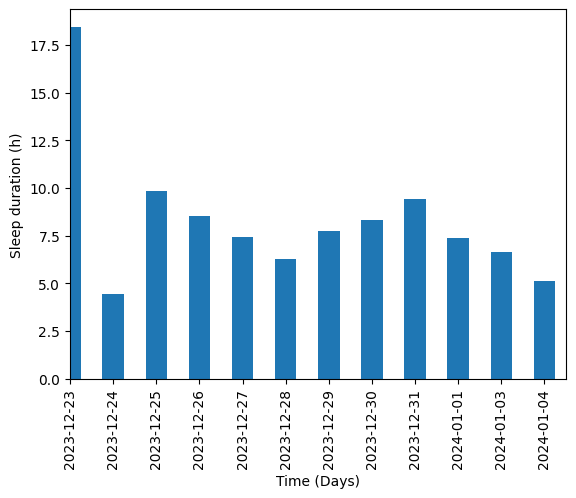

In [26]:
df_sleeptime_grouped = df_sleeptime.groupby(df_sleeptime['Calendar Date (Local)'].dt.date)['Duration (h)'].sum()

df_sleeptime_grouped.plot(x ='Calendar Date (Local)', y='Duration (h)', kind='bar'),
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.ylabel("Sleep duration (h)")
plt.xlabel("Time (Days)")

plt.show()